In [47]:
import pandas as pd 
import numpy as np


In [48]:
df = pd.read_csv("Algerian_forest_fires_cleand_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [49]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [50]:
df.drop(["month", "day", "year"], axis = 1, inplace = True)

In [51]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [52]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [53]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0 , 1)

In [54]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [55]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [56]:
# dividing features in to dependent and independent features
X = df.drop("FWI", axis = 1)
y = df["FWI"]


In [57]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [58]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [59]:
# train test split 
from sklearn.model_selection import train_test_split as tts

In [60]:
X_train,X_test,y_train,y_test = tts (X,y, test_size = 0.3, random_state = 42)

In [61]:
#  feature selection based on correlation 
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

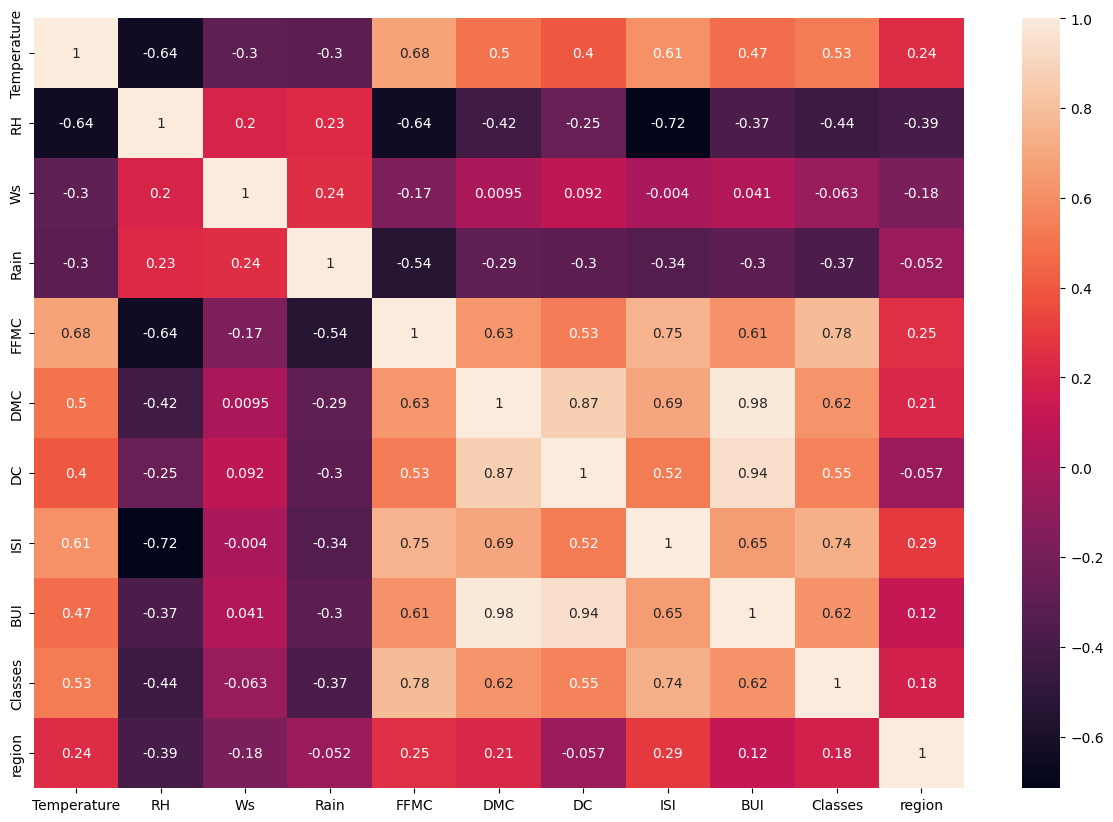

In [62]:
plt.figure(figsize = (15,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)
plt.show 

## if 2 different features are highlly corelated then we can remove one of them because if one is increasing the other will also increase that mean both or same so we can remove one the amount of corelation will be selected by domain experts if any features are corelated more than 90 remove one of them like that they will decide the amount of corealtion value based on their knowledger  this not applicabel between independent and dependent features only work on between independent features. 

## both if highlly -ve lly correlated or +ve lly correlated features then one of the feature from each will be removed +ve represent as one increases the other will also increases for -ve represent as one increases the other will decreases

In [63]:
def correlation(dataset, thrushold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> thrushold: # using abs because it will convert -ve values into +ve values
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [64]:
cor_columns = correlation(X_train, 0.85)

In [65]:
X_train.drop(cor_columns, axis = 1, inplace = True)
X_test.drop(cor_columns, axis = 1, inplace = True)
X_train.shape, X_test.shape

((170, 9), (73, 9))

# feature scalling standardization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [ ]:
scaled_x_train

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
         0.90992142, -1.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
        -1.098996  , -1.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
        -1.098996  , -1.        ]])

# box plot to understand the standardization 

C:\Users\Abhishek B O\AppData\Local\Temp\ipykernel_10588\1937393082.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

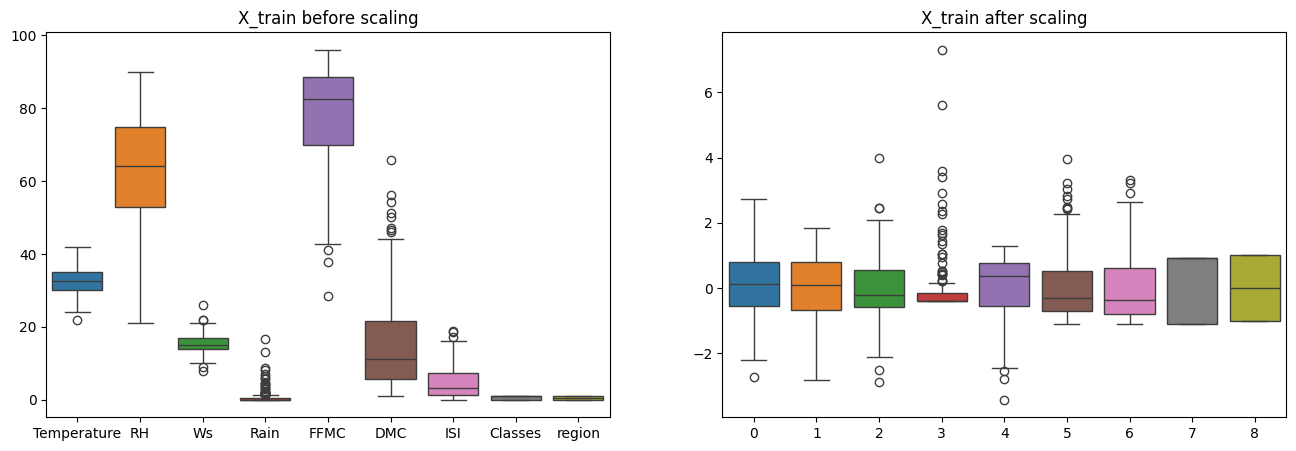

In [ ]:
plt.subplots(figsize = (16,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title ("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = scaled_x_train)
plt.title ("X_train after scaling")

# model training 

### Linear regression model 

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
model = regression.fit(scaled_x_train, y_train)

In [ ]:
y_pred = model.predict(scaled_x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)


In [ ]:
print(mse)
print(mae)
print(score)

0.6829306792403725
0.5648036371485072
0.9847206874554418


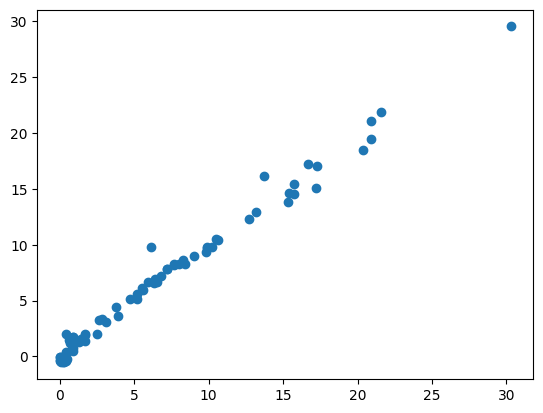

In [ ]:
plt.scatter(y_test, y_pred)


1.1203368882393199
0.9298380301537672


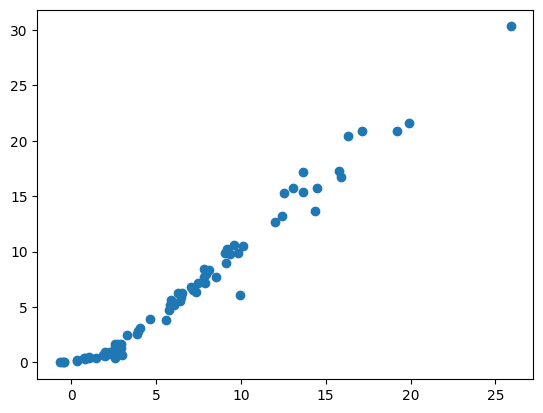

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(scaled_x_train,y_train)
y_pred = lasso.predict(scaled_x_test)
mae = mean_absolute_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
print(mae)
print(score)
plt.scatter(y_pred,y_test)

0.5844876727578021
0.9831992697994193


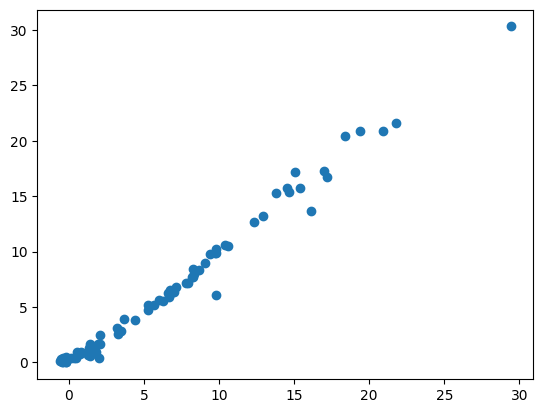

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(scaled_x_train,y_train)
y_pred = ridge.predict(scaled_x_test)
mae = mean_absolute_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
print(mae)
print(score)
plt.scatter(y_pred,y_test)

1.8554687479717549
0.7943816956032856


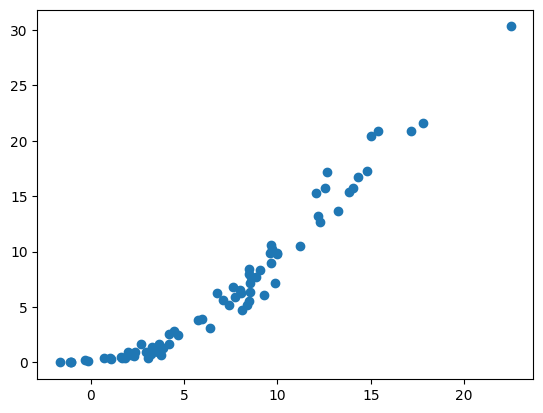

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
Elastic = ElasticNet()
Elastic.fit(scaled_x_train,y_train)
y_pred = Elastic.predict(scaled_x_test)
mae = mean_absolute_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
print(mae)
print(score)
plt.scatter(y_pred,y_test)

# Cross validation 

0.6856401038998683
0.9790305445425309


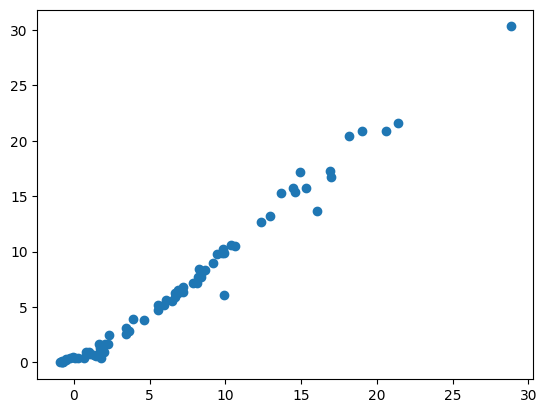

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
Elasticcv = ElasticNetCV()
Elasticcv.fit(scaled_x_train,y_train)
y_pred = Elasticcv.predict(scaled_x_test)
mae = mean_absolute_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
print(mae)
print(score)
plt.scatter(y_pred,y_test)

0.635601574451742
0.9808921129263425


array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

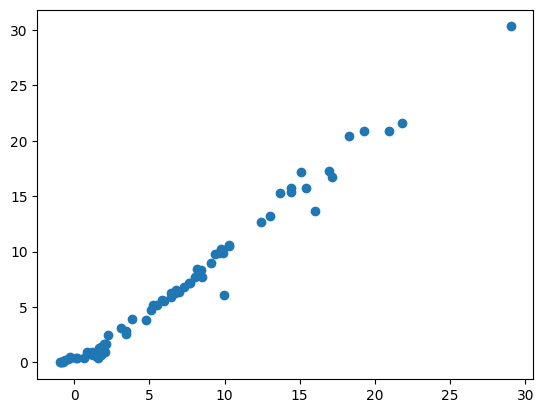

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score
Lassocv = LassoCV(cv = 5)
Lassocv.fit(scaled_x_train,y_train)
y_pred = Lassocv.predict(scaled_x_test)
mae = mean_absolute_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
print(mae)
print(score)
plt.scatter(y_pred,y_test)
Lassocv.mse_path_

0.7943132619521893
0.973475588252513


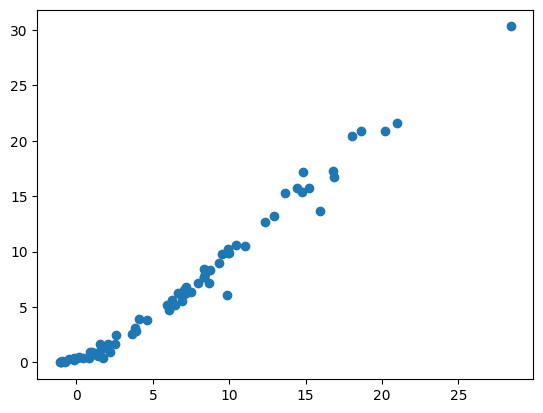

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
# Ridgecv = RidgeCV() # by default it perform a loocv(leave one out cv type of cross validation method)
Ridgecv = RidgeCV(cv = 5) # here it will do k fold cv type of cross validation 
Ridgecv.fit(scaled_x_train,y_train)
y_pred = Ridgecv.predict(scaled_x_test)
mae = mean_absolute_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
print(mae)
print(score)
plt.scatter(y_pred,y_test)

In [ ]:
import pickle

In [ ]:
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(ridge, open("ridge.pkl", "wb"))

In [ ]:
scaler

StandardScaler()